# California ACT SAT Analysis


## ACT Analysis (2/3)

### Contents:
- [Data Import](#Data-Import)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
- [Data Dictionary](#Data-Dictionary)

## Data Import

### All libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

In [2]:
# Change to display the max number of rows and columns
# Reference: https://kakakakakku.hatenablog.com/entry/2021/04/19/090229
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in the data

####  2019 ACT Scores in California by School

In [3]:
# Import and display the datasets
act = pd.read_csv('../data/original/act_2019_ca.csv')
act.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [4]:
# check data info
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [5]:
act.shape

(2310, 18)

## Data Cleaning

### Check for missing values

`Unnamed: 17` column was deleted, as there are 2310 missing values. Also, rows with missing values in `SName` were dropped as there are 581 values and school names cannot be estimated. Also, rows with missing values in `NumGE21`, were dropped as these rows are also missing values in other columns like `PctGE21`, `AvgScrSci`, `AvgScrMath`, and `AvgScrRead`. These process handled all the missing values in the dataset.

In [6]:
# Check any missing values 
act.isnull().sum().sort_values(ascending=False)

Unnamed: 17    2310
SName           581
SCode           523
AvgScrEng       357
PctGE21         357
NumGE21         357
AvgScrSci       357
AvgScrMath      357
AvgScrRead      357
DName            59
Year              1
CDS               1
CCode             1
Enroll12          1
CName             1
RType             1
CDCode            1
NumTstTakr        1
dtype: int64

In [7]:
# Drop Unnamed: 17 columns 
act.drop(columns=['Unnamed: 17'], inplace=True)

In [8]:
# Drop rows with missing values in 'SName' and 'NumGE21' column 
act.dropna(subset=['SName', 'NumGE21'], axis=0, inplace=True)

In [9]:
# Check the missing values again
act.isnull().sum().sort_values(ascending=False)

CDS           0
NumTstTakr    0
PctGE21       0
NumGE21       0
AvgScrSci     0
AvgScrMath    0
AvgScrEng     0
AvgScrRead    0
Enroll12      0
CCode         0
CName         0
DName         0
SName         0
RType         0
SCode         0
CDCode        0
Year          0
dtype: int64

In [10]:
act.shape

(1437, 17)

### Check for [*] values 

There are `*` values listed in columns like `AvgScrRead`, `AvgScrEng`,`AvgScrMath`, `AvgScrSci`, `NumGE21`, and `PctGE21`. According to the source, an asterisk `*` is displayed for schools with 14 or fewer students taking the ACT in order to preserve the anonymity of the students. These rows were dropped from the dataset. 

In [11]:
# List columns where data types are 'object'
# Reference: https://stackoverflow.com/questions/43049545/python-check-if-dataframe-column-contain-string-type
act.columns[act.dtypes==object].tolist()

['RType',
 'SName',
 'DName',
 'CName',
 'AvgScrRead',
 'AvgScrEng',
 'AvgScrMath',
 'AvgScrSci',
 'NumGE21',
 'PctGE21',
 'Year']

In [12]:
# Print unique values in 'AvgScr' in all sections
print('AvgScrRead')
print(act['AvgScrSci'].unique())
print('----------')

print('AvgScrEng')
print(act['AvgScrEng'].unique())
print('----------')

print('AvgScrMath')
print(act['AvgScrMath'].unique())
print('----------')

print('AvgScrSci')
print(act['AvgScrSci'].unique())
print('----------')

AvgScrRead
['23' '22' '16' '17' '*' '25' '27' '15' '18' '24' '26' '21' '19' '28' '29'
 '20' '12' '13' '14' '31' '30']
----------
AvgScrEng
['22' '20' '15' '18' '*' '29' '14' '17' '23' '24' '26' '27' '25' '16' '13'
 '30' '28' '21' '19' '31' '10' '11' '32' '12']
----------
AvgScrMath
['22' '23' '17' '18' '*' '25' '28' '15' '24' '16' '27' '21' '19' '30' '26'
 '20' '14' '29' '32' '31']
----------
AvgScrSci
['23' '22' '16' '17' '*' '25' '27' '15' '18' '24' '26' '21' '19' '28' '29'
 '20' '12' '13' '14' '31' '30']
----------


In [13]:
# An asterisk is displayed for schools with 14 or fewer students taking the ACT 
# in order to preserve the anonymity of the students. 

# Replace '*' to np.nan
act = act.replace('*', np.nan)

# Drop columns where value is nan
act.dropna(axis=0, how = 'any', inplace=True)

In [14]:
act.shape

(1017, 17)

### Check for outliers (California statewide level data) 

The dataset includes `State of California` data. As this would impact the analysis later, its data was deleted its row from the original dataset and saved in a new dataset called `act_cali` (which ended up not being used for this project). 

In [15]:
# Descriptive statistics
act.describe()

,CDS,CCode,CDCode,SCode,Enroll12,NumTstTakr
count,1.017000e+03,1017.000000,1.017000e+03,1.017000e+03,1017.000000,1017.000000
mean,2.867147e+13,28.004916,2.867146e+06,2.271240e+06,852.931170,160.352999
std,1.342501e+13,13.397797,1.342501e+06,1.726057e+06,15343.857174,2590.623389
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,15.000000
25%,1.964733e+13,19.000000,1.964733e+06,1.342700e+05,173.000000,33.000000
50%,3.066522e+13,30.000000,3.066522e+06,1.939149e+06,382.000000,58.000000
75%,3.768346e+13,37.000000,3.768346e+06,3.730066e+06,524.000000,105.000000
max,5.872770e+13,58.000000,5.872769e+06,6.120158e+06,489650.000000,82668.000000


In [16]:
# Look up the row that has the max number of enrollment
act.loc[act['Enroll12'] == 489650]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
2070,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,82668.0,22,22,22,22,45466,55.00,2018-19


In [17]:
# Save this to a new dataset
act_cali = pd.DataFrame(act.loc[act['Enroll12'] == 489650])
act_cali

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
2070,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,82668.0,22,22,22,22,45466,55.00,2018-19


In [18]:
# Delete the column in act dataset
act.drop([2070], inplace=True)

In [19]:
act.shape

(1016, 17)

### Fix any incorrect data types

The data types for `AvgScrRead`, `AvgScrEng`, `AvgScrMath`, `AvgScrSci`, `NumGE21`, and `PctGE21` columns were incorrectly saved as `object`. I converted these data types to `integers`.

In [20]:
# Check data types
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 3 to 2306
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         1016 non-null   float64
 1   CCode       1016 non-null   float64
 2   CDCode      1016 non-null   float64
 3   SCode       1016 non-null   float64
 4   RType       1016 non-null   object 
 5   SName       1016 non-null   object 
 6   DName       1016 non-null   object 
 7   CName       1016 non-null   object 
 8   Enroll12    1016 non-null   float64
 9   NumTstTakr  1016 non-null   float64
 10  AvgScrRead  1016 non-null   object 
 11  AvgScrEng   1016 non-null   object 
 12  AvgScrMath  1016 non-null   object 
 13  AvgScrSci   1016 non-null   object 
 14  NumGE21     1016 non-null   object 
 15  PctGE21     1016 non-null   object 
 16  Year        1016 non-null   object 
dtypes: float64(6), object(11)
memory usage: 142.9+ KB


In [21]:
# Convert object data types to integers 
act['AvgScrRead'] = act['AvgScrRead'].astype(float)
act['AvgScrEng'] = act['AvgScrEng'].astype(float)
act['AvgScrMath'] = act['AvgScrMath'].astype(float)
act['AvgScrSci'] = act['AvgScrSci'].astype(float)
act['NumGE21'] = act['NumGE21'].astype(float)
act['PctGE21'] = act['PctGE21'].astype(float)

In [22]:
# Check data types again
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 3 to 2306
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         1016 non-null   float64
 1   CCode       1016 non-null   float64
 2   CDCode      1016 non-null   float64
 3   SCode       1016 non-null   float64
 4   RType       1016 non-null   object 
 5   SName       1016 non-null   object 
 6   DName       1016 non-null   object 
 7   CName       1016 non-null   object 
 8   Enroll12    1016 non-null   float64
 9   NumTstTakr  1016 non-null   float64
 10  AvgScrRead  1016 non-null   float64
 11  AvgScrEng   1016 non-null   float64
 12  AvgScrMath  1016 non-null   float64
 13  AvgScrSci   1016 non-null   float64
 14  NumGE21     1016 non-null   float64
 15  PctGE21     1016 non-null   float64
 16  Year        1016 non-null   object 
dtypes: float64(12), object(5)
memory usage: 142.9+ KB


### Rename column names

The column names in this dataset was renamed with lowercase and snakecase to improve readability and consistency of code. 

In [23]:
# Check current column names
act.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTstTakr', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath',
       'AvgScrSci', 'NumGE21', 'PctGE21', 'Year'],
      dtype='object')

In [24]:
# Rename column names to lower and snakecase
act = act.rename(columns = {
    'CDS': 'cds',
    'CCode': 'c_code',
    'CDCode': 'cd_code',
    'SCode': 's_code',
    'RType': 'r_type',
    'SName': 'school',
    'DName': 'district',
    'CName': 'county',
    'Enroll12': 'enroll_of_grade12',
    'NumTstTakr': 'num_of_testtakers',
    'AvgScrRead': 'avg_score_reading',
    'AvgScrEng': 'avg_score_english',
    'AvgScrMath': 'avg_score_math',
    'AvgScrSci': 'avg_score_science',
    'NumGE21': 'num_testtakers_compositescr_21_and_up',  
    'PctGE21': 'pct_testtakers_compositescr_21_and_up',
    'Year': 'year'
})

In [25]:
act.columns

Index(['cds', 'c_code', 'cd_code', 's_code', 'r_type', 'school', 'district',
       'county', 'enroll_of_grade12', 'num_of_testtakers', 'avg_score_reading',
       'avg_score_english', 'avg_score_math', 'avg_score_science',
       'num_testtakers_compositescr_21_and_up',
       'pct_testtakers_compositescr_21_and_up', 'year'],
      dtype='object')

### Drop unnecessary columns

`cds`, `c_code`, `cd_code`, `s_code`, `r_type`, `enroll_of_grade12`, and `year` columns were irrelevant and thus deleted from the dataset. 

In [26]:
act.drop(columns=['cds',
                  'c_code',
                  'cd_code',
                  's_code',
                  'r_type',
                  'enroll_of_grade12',
                  'year'], inplace=True)

In [27]:
act.head(2)

,school,district,county,num_of_testtakers,avg_score_reading,avg_score_english,avg_score_math,avg_score_science,num_testtakers_compositescr_21_and_up,pct_testtakers_compositescr_21_and_up
3,Abraham Lincoln High,San Jose Unified,Santa Clara,53.0,23.0,22.0,22.0,23.0,34.0,64.15
4,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,19.0,21.0,20.0,23.0,22.0,11.0,57.89


In [28]:
act.shape

(1016, 10)

### Save cleaned dataframe as csv files

In [29]:
    act.to_csv('../data/act_2019_ca_clean.csv')

## Exploratory Data Analysis

### Summary Statistics

In [30]:
# Summary Statistics
act.describe()

,num_of_testtakers,avg_score_reading,avg_score_english,avg_score_math,avg_score_science,num_testtakers_compositescr_21_and_up,pct_testtakers_compositescr_21_and_up
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,79.144685,21.870079,21.017717,21.270669,21.189961,43.673228,51.306850
std,66.574849,3.823038,4.209031,3.499833,3.335189,50.111339,26.534076
min,15.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000
25%,33.000000,19.000000,18.000000,18.000000,19.000000,12.000000,28.570000
50%,58.000000,22.000000,21.000000,21.000000,21.000000,24.000000,52.860000
75%,105.000000,25.000000,24.000000,24.000000,24.000000,55.000000,74.700000
max,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000


In [31]:
# Check how many counties are covered in data
len(act.groupby('county'))

53

The geographical chart that shows county coverage (53 counties) was created in Tableau. See below image. 

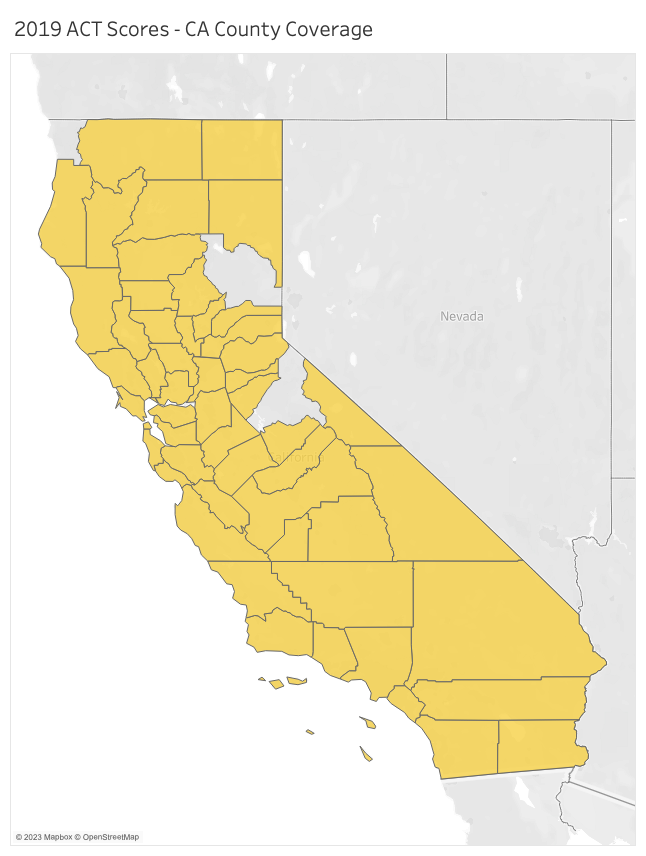

### Counties with the highest and lowest mean test scores

The objective of this project is to identify which California counties perform the lowest performance in ACT exam in 2019. The below bar chart illustrates the counties with the higest and lowest percentage of test-takers who achieved an ACT composite score to be 21 and higher. This score puts students at the 50th percentile, indicating that they score higher than 50% of all test takers. 

In [32]:
# Group by county and the mean test score (%)
act_county = act.groupby('county')['pct_testtakers_compositescr_21_and_up']\
    .mean().sort_values(ascending=True)

In [33]:
# Extract the lowest county
act_bottom = act_county[0:1]

# Extract the highest county
act_top = act_county[-1:]

# Combine top and bottom counties
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine_first.html
act_top_bottom = act_top.combine_first(act_bottom).sort_values(ascending=True)
act_top_bottom

county
Modoc        15.835
Calaveras    84.210
Name: pct_testtakers_compositescr_21_and_up, dtype: float64

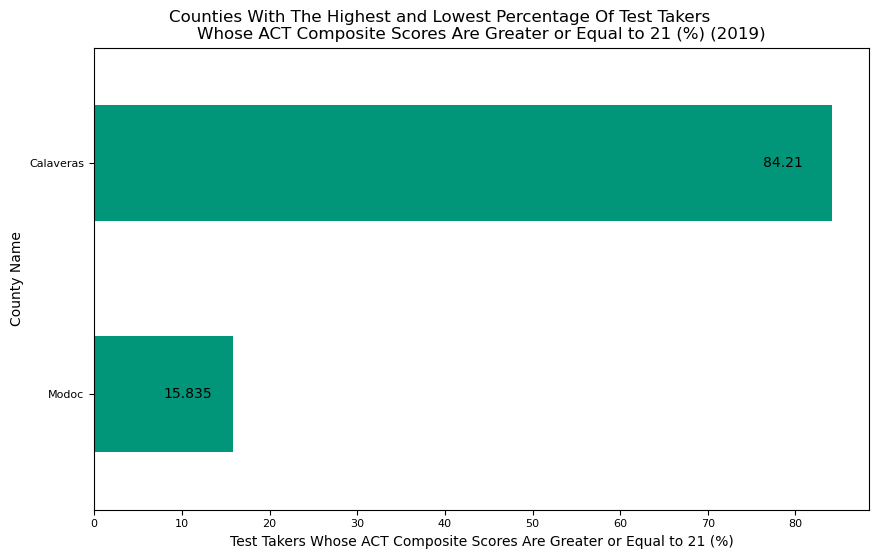

In [34]:
# Create a chart
# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
act_tb = act_top_bottom.plot(kind='barh', 
                    fontsize = 8, 
                    figsize = (10, 6), 
                    color= '#01967a') 
plt.title('Counties With The Highest and Lowest Percentage Of Test Takers\
                \nWhose ACT Composite Scores Are Greater or Equal to 21 (%) (2019)')
plt.xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)')
plt.ylabel('County Name')
act_tb.bar_label(act_tb.containers[0], label_type='edge', padding=-50);


### 10 Counties with the lowest percentage of test-takers who achived ACT composite scores of 21 and higher

The below bar chart exhibits the 10 California counties with the lowest percentages of test-takers who achieved ACT composite scores of 21 or higher. Additionally, the second bar chart illustrates the number of schools in these ten counties.

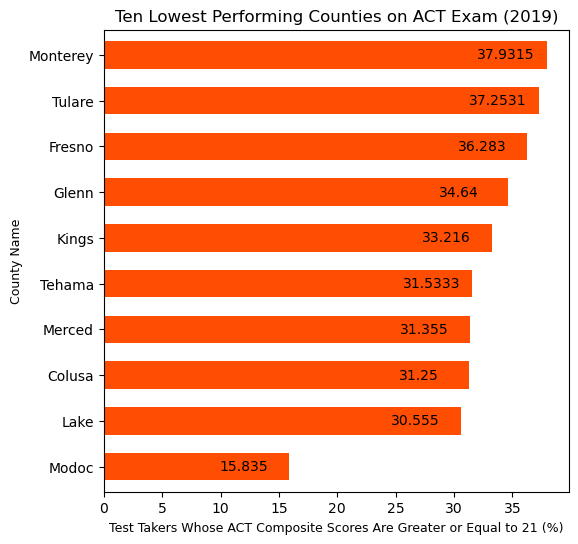

In [35]:
# Extract 10 counties with lowest % of test-takers who achieved ACT scores of 21 and above
act_10 = act_county[0:10]

# Size
plt.figure(figsize=(6, 6))

# Create a barchart
# Reference: https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
act_10_w = act_10.plot(kind='barh', 
                       width=0.6,
                       color='#ff4d01')
plt.title('Ten Lowest Performing Counties on ACT Exam (2019)')  
plt.xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
plt.ylabel('County Name', fontsize=9)
act_10_w.bar_label(act_10_w.containers[0], label_type='edge', padding=-50);


In [36]:
# Check the index name
act_10.index

Index(['Modoc', 'Lake', 'Colusa', 'Merced', 'Tehama', 'Kings', 'Glenn',
       'Fresno', 'Tulare', 'Monterey'],
      dtype='object', name='county')

In [37]:
# Pull the number of schools for the above 10 counties

# Create a dataframe, group by county and school
act_schl = pd.DataFrame(act.groupby('county')['school'].count()).reset_index()

# Take the top 10 counties
act_10_sch = act_schl.loc[(act_schl['county']=='Modoc') | 
                               (act_schl['county']=='Lake') |
                               (act_schl['county']=='Colusa') |
                               (act_schl['county']=='Merced') |
                               (act_schl['county']=='Tehama') |
                               (act_schl['county']=='Kings') |
                               (act_schl['county']=='Glenn') |
                               (act_schl['county']=='Fresno') |
                               (act_schl['county']=='Tulare') |
                               (act_schl['county']=='Monterey')]

In [38]:
# Sort datafram to align with above chart
# Reference: https://practicaldatascience.co.uk/data-science/how-to-use-pandas-categorical-dtype-to-create-custom-sort-orders
sort_order = ['Modoc', 'Lake', 'Colusa', 
              'Merced', 'Tehama', 'Kings', 'Glenn',
              'Fresno', 'Tulare', 'Monterey']

pd.options.mode.chained_assignment = None  # default='warn', delete warning 
act_10_sch.loc[:, "county"] = pd.Categorical(act_10_sch["county"], categories=sort_order)

act_10_sch = act_10_sch.sort_values(by="county")

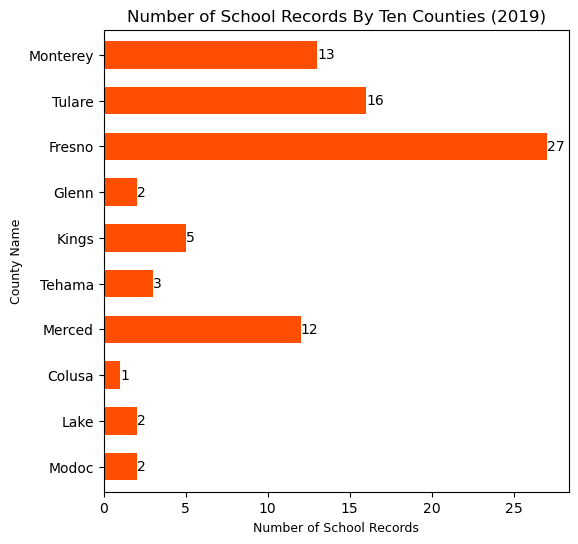

In [39]:
# Create a barchart
# Reference: https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
act_10_sch = act_10_sch.plot(x='county', 
                             y='school', 
                             kind='barh', 
                             legend=False,
                             width=0.6,
                             figsize = (6, 6),
                             color='#ff4d01') 
plt.title('Number of School Records By Ten Counties (2019)')  
plt.xlabel('Number of School Records', fontsize=9)
plt.ylabel('County Name', fontsize=9)
act_10_sch.bar_label(act_10_sch.containers[0], label_type='edge', padding=0);

### Correlation across different datasets

The heatmap displays any correlations between different sections of the ACT exams. All the exam subjects have over 95% relationships with the `Percentage of testtakers whose ACT composite scores are greater or equal to 21` column. 

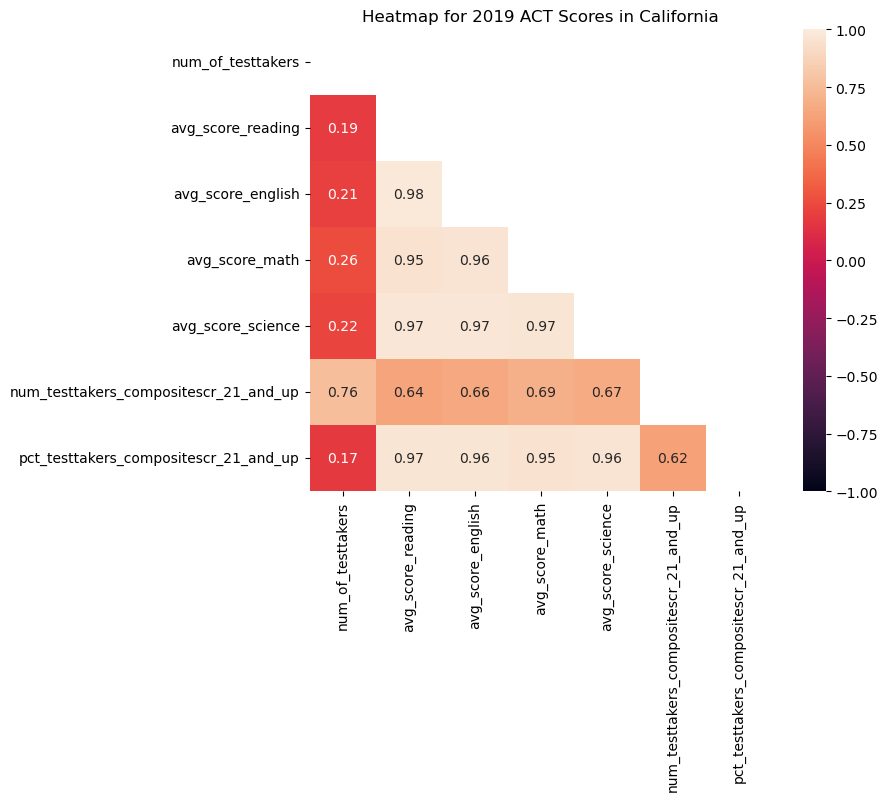

In [40]:
# Delete the upper triangle of a heatmap
# Reference: GA's Lesson - 107 Data Visualization
mask = np.zeros_like(act.corr()) 
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
plt.figure(figsize = (8,6))
sns.heatmap(act.corr(), mask = mask, annot = True, vmin = -1, vmax = 1, square=True)
plt.title('Heatmap for 2019 ACT Scores in California');

### Distribution of Average Test Scores by Subject

This boxplot represents the average test scores by subject. In California, reading had the highest average test score, followed by Math, Science and English. The average score in English subject had the widest score range (between min and max scores) than others, while Math had the shorest score range. 

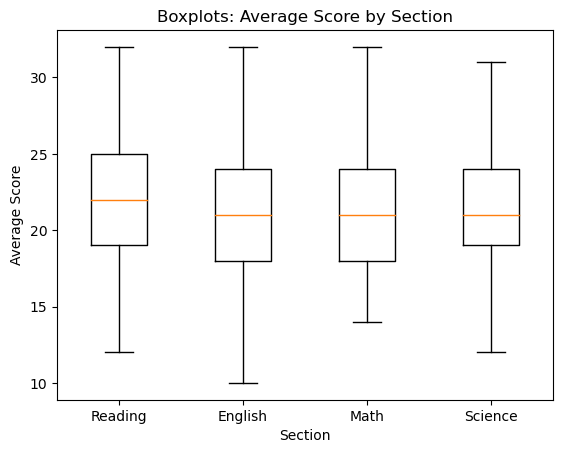

In [41]:
# Create a boxplot 
box_plot_data = [act.avg_score_reading,
                 act.avg_score_english,
                 act.avg_score_math,
                 act.avg_score_science]

plt.boxplot(box_plot_data, labels=['Reading','English','Math', 'Science'])
plt.boxplot
plt.title('Boxplots: Average Score by Section')
plt.xlabel('Section')
plt.ylabel('Average Score');

### Correlation between the % of students achieving ACT composite scores of 21 and up and 4 subjects. 

These four scatter charts display the correlation between 4 different subjects and the percentage of students achieving ACT scores of 21 and above. Again, a 21 ACT score places students at the 50th percentile, indicating that they score higher than 50% of all test takers. 

The charts reveal that there are robust correlations across all four subjects, indicating that these subjects are all crucial to enhance the percentage of students obtaining ACT composite scores of 21 or higher.

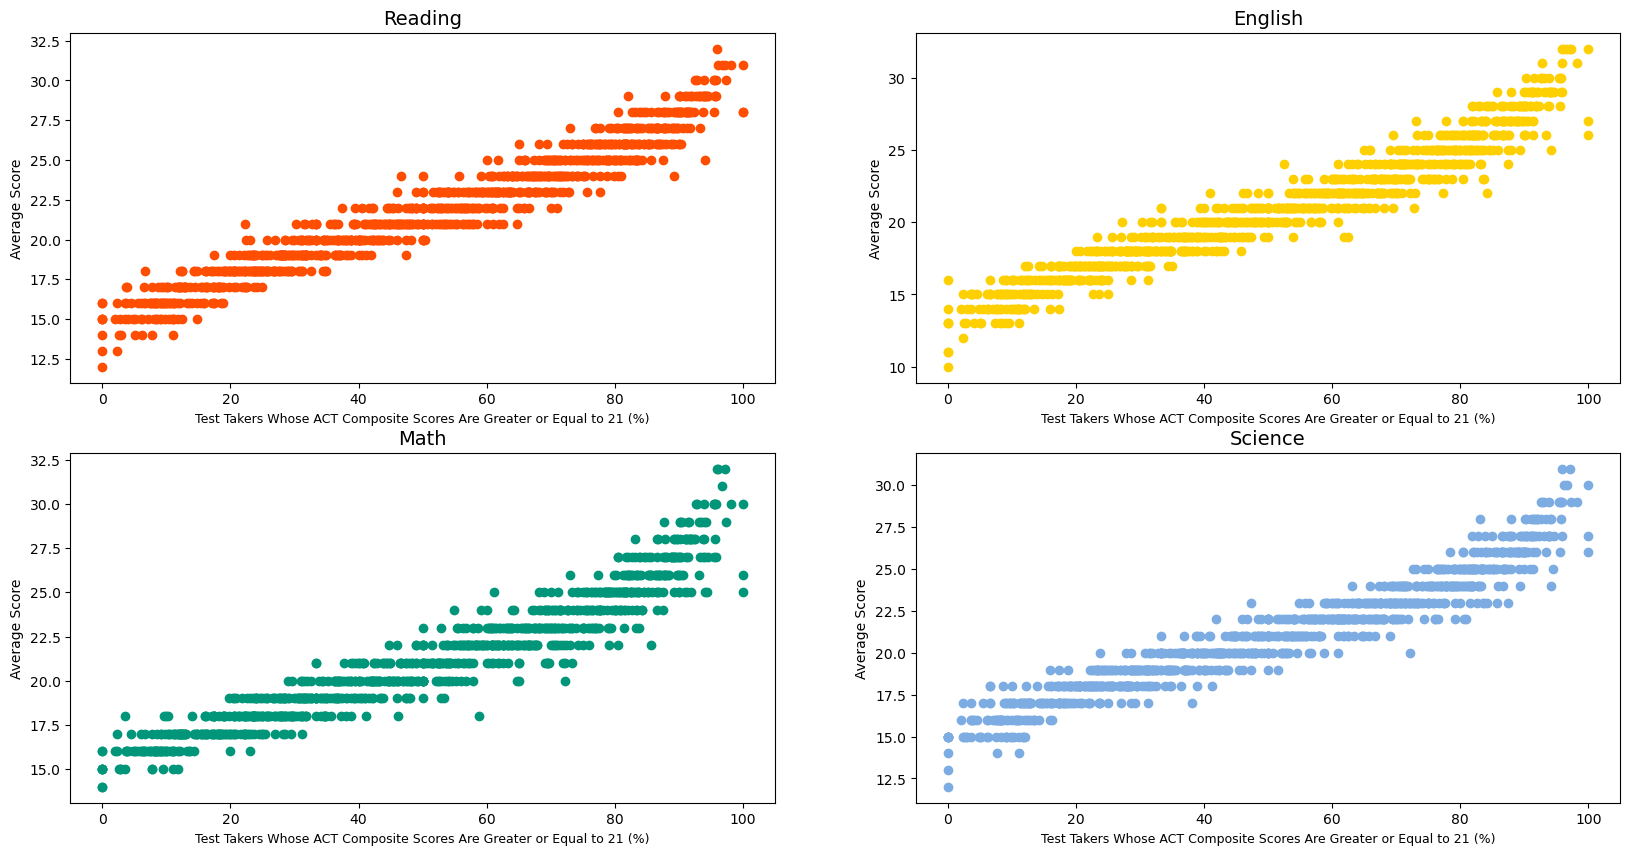

In [42]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))

# Correlation - reading (r=0.97)
x_read= [act.pct_testtakers_compositescr_21_and_up]
y_read = [act.avg_score_reading]
axes[0][0].scatter(x_read, y_read, color='#ff4d01')
axes[0][0].set_title('Reading', fontsize=14)
axes[0][0].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[0][0].set_ylabel('Average Score')

# Correlation - English (r=0.96)
x_eng = [act.pct_testtakers_compositescr_21_and_up]
y_eng = [act.avg_score_english]
axes[0][1].scatter(x_eng, y_eng, color='#fed002')
axes[0][1].set_title('English', fontsize=14)
axes[0][1].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[0][1].set_ylabel('Average Score')

# Correlation - math (r=0.95)
x_math = [act.pct_testtakers_compositescr_21_and_up]
y_math = [act.avg_score_math]
axes[1][0].scatter(x_math, y_math, color='#01967a')
axes[1][0].set_title('Math', fontsize=14)
axes[1][0].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[1][0].set_ylabel('Average Score')

# Correlation - science (r=0.96)
x_sci = [act.pct_testtakers_compositescr_21_and_up]
y_sci = [act.avg_score_science]
axes[1][1].scatter(x_sci, y_sci, color='#7cace1')
axes[1][1].set_title('Science', fontsize=14)
axes[1][1].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[1][1].set_ylabel('Average Score')

plt.show();

In [43]:
# Average test score by sections in 10 Counties with worst test scores 
act_10_score = act.loc[(act['county']=='Modoc') | 
                               (act['county']=='Lake') |
                               (act['county']=='Colusa') |
                               (act['county']=='Merced') |
                               (act['county']=='Tehama') |
                               (act['county']=='Kings') |
                               (act['county']=='Glenn') |
                               (act['county']=='Fresno') |
                               (act['county']=='Tulare') |
                               (act['county']=='Monterey')]

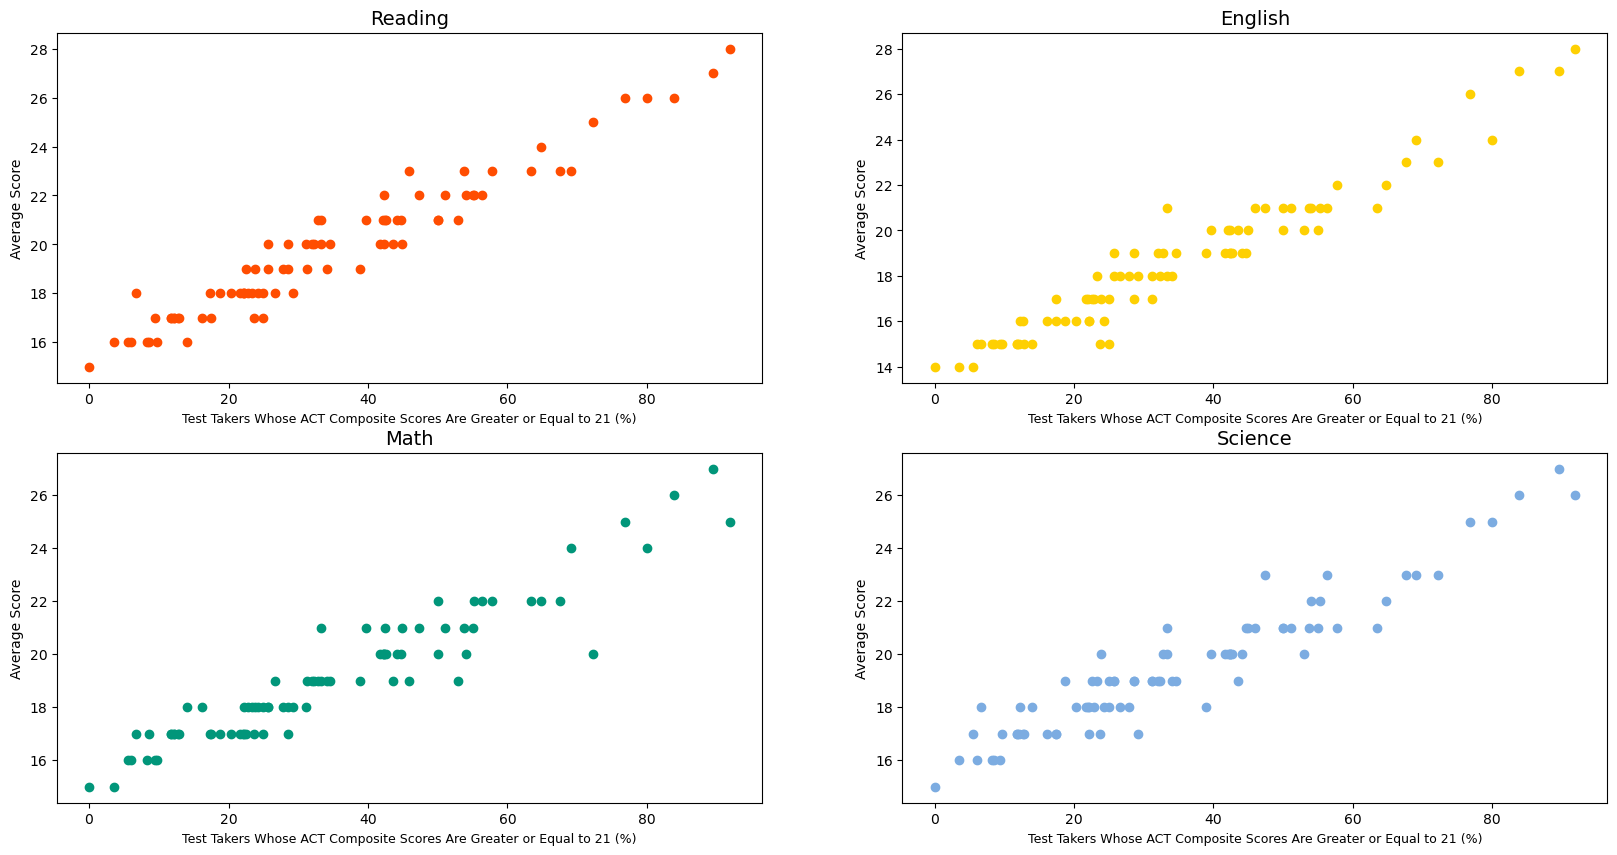

In [44]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))

x_read= [act_10_score.pct_testtakers_compositescr_21_and_up]
y_read = [act_10_score.avg_score_reading]
axes[0][0].scatter(x_read, y_read, color='#ff4d01')
axes[0][0].set_title('Reading', fontsize=14)
axes[0][0].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[0][0].set_ylabel('Average Score')

x_eng = [act_10_score.pct_testtakers_compositescr_21_and_up]
y_eng = [act_10_score.avg_score_english]
axes[0][1].scatter(x_eng, y_eng, color='#fed002')
axes[0][1].set_title('English', fontsize=14)
axes[0][1].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[0][1].set_ylabel('Average Score')

x_math = [act_10_score.pct_testtakers_compositescr_21_and_up]
y_math = [act_10_score.avg_score_math]
axes[1][0].scatter(x_math, y_math, color='#01967a')
axes[1][0].set_title('Math', fontsize=14)
axes[1][0].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[1][0].set_ylabel('Average Score')

x_sci = [act_10_score.pct_testtakers_compositescr_21_and_up]
y_sci = [act_10_score.avg_score_science]
axes[1][1].scatter(x_sci, y_sci, color='#7cace1')
axes[1][1].set_title('Science', fontsize=14)
axes[1][1].set_xlabel('Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (%)', fontsize=9)
axes[1][1].set_ylabel('Average Score')

plt.show();

### Average Test Score by Subject, State of California vs 10 Lowest Performing Counties on ACT

The grouped bar chart represents a comparison of the average test scores by subject, between the state of California and 10 lowest performing counties. The result indicates that English and Math had the most significant difference (%) in average test scores between California and 10 counties. (Difference (%): English = 13.3%, Math: 11.3%) This indicates that these counties particularly need to focus on improving their scores in English and Math. 

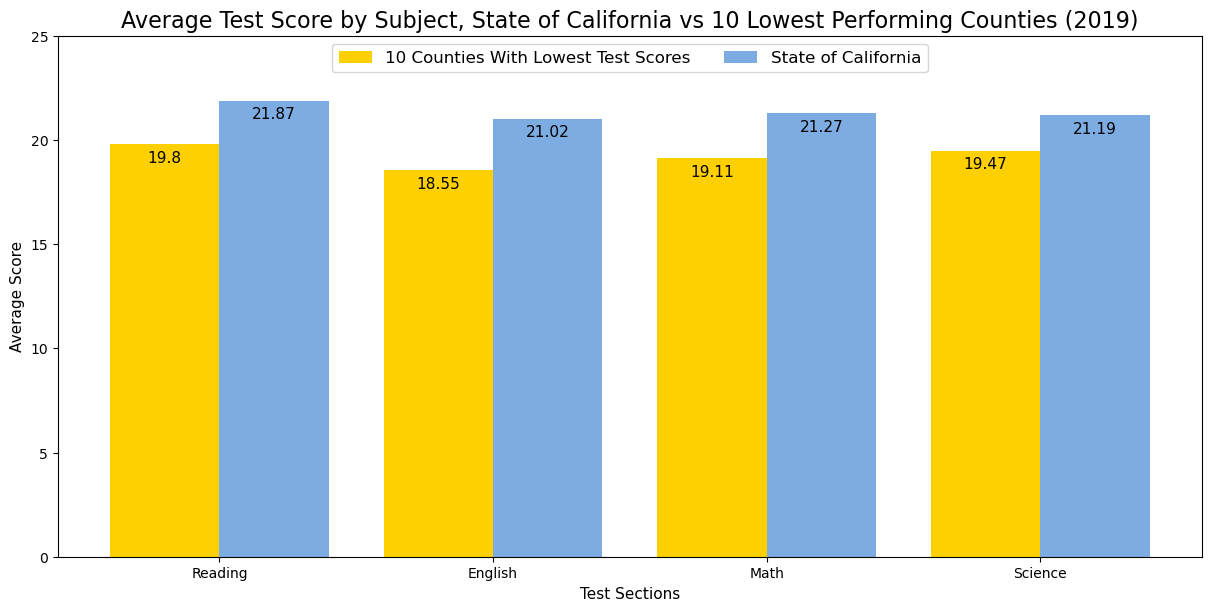

In [45]:
# Create a chart of average test score comparison by Statewide Levels and 10 Counties with Lowest Test Scores

# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

# Create dataset
section = ('Reading', 'English', 'Math', 'Science')
act_avg_score = {
    '10 Counties With Lowest Test Scores': (round(act_10_score['avg_score_reading'].mean(), 2),
                                            round(act_10_score['avg_score_english'].mean(), 2),
                                            round(act_10_score['avg_score_math'].mean(), 2),
                                            round(act_10_score['avg_score_science'].mean(), 2)
                                           ),
    'State of California': (round(act['avg_score_reading'].mean(), 2), 
                                     round(act['avg_score_english'].mean(), 2),
                                     round(act['avg_score_math'].mean(), 2), 
                                     round(act['avg_score_science'].mean(), 2)
                                     )}

x = np.arange(len(section)) # the label locations
width = 0.4 # the width of the bars
multiplier=0
colors = {'10 Counties With Lowest Test Scores':'#fed002', 
          'State of California': '#7cace1'}

# Create a chart
fig, ax = plt.subplots(layout = 'constrained', figsize=(12, 6))

for attribute, measurement in act_avg_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute])
    ax.bar_label(rects, padding=-15, fontsize=11)
    multiplier += 1


# Customize the chart
ax.set_ylabel('Average Score', fontsize=11)
ax.set_xlabel('Test Sections', fontsize=11)
ax.set_title('Average Test Score by Subject, State of California vs 10 Lowest Performing Counties (2019)',\
            fontsize=16)
ax.set_xticks(x+width/2, section)
ax.set_ylim(0, 25)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=12)
plt.show();

## Conclusion and Recommendations

### Score Performance on ACT test in California (2019)
- The ten lowest performing counties on ACT exam in 2019 were Modoc, Lake, Colusa, Merced, Tehama, Kings, Glenn, Fresno, Tulare, and Moneterey.
- Among these ten counties, Monterey, Tulare, and Fresno had the highest number of schools. Therefore, providing additional exam preparation resources could be beneficial.
- Modoc County recorded the lowest percentage of students achieving ACT composite scores of 21 or higher (16%). This difference is significant compared to Calaveras County, which recorded the highest percentage of test-takers scoring ACT composite scores of 21 or higher (84%). 
- All four subjects (Reading, English, Math, and Science) are essential to increase the percentage of students achieving ACT composite scores of 21 or higher. The ten lowest-performing counties particularly need to focus on improving their scores in English and Math.

## Data Dictionary
What is data dictionary? Here are some references:
* [data dictionary](http://library.ucmerced.edu/node/10249)
* [Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

|Feature|Type|Dataset|Description|
|---|---|---|---|
|school|object|ACT|School Name|
|district|object|ACT|District Name|
|county|object|ACT|County Name|
|num_of_testtakers|float|ACT|Number of Test Takers|
|avg_score_reading|float|ACT|Average ACT Reading Score|
|avg_score_english|float|ACT|Average ACT  English Score|
|avg_score_math|float|ACT|Average ACT Math Score| 
|avg_score_science|float|ACT|Average ACT Science Score| 
|num_testtakers_compositescr_21_and_up|float|ACT|Number of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21|
|pct_testtakers_compositescr_21_and_up|float|ACT|Percent of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21|
